# Broadcasting Demo

**STATS 305C: Applied Statistics III**

_Stanford University. Spring, 2022._

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slinderman/stats305c/blob/master/notebooks/lecture8-broadcasting_demo.ipynb)

---




Many questions came up in office hours about how to use broadcasting and index tricks in PyTorch. You can read more about these features here:

https://pytorch.org/docs/stable/notes/broadcasting.html

In short, the rules are the same as for Numpy, which is all documented here:

https://numpy.org/doc/stable/user/basics.broadcasting.html

Numpy also supports many indexing tricks to make your life easier. You can read about those here:

https://numpy.org/doc/stable/user/basics.indexing.html

This notebook illustrates a few use cases.

In [1]:
import torch
from torch.distributions import MultivariateNormal

import matplotlib.pyplot as plt 


## Fancy indexing with binary masks

In [2]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [3]:
# Getting entries of A according to mask
mask = torch.tensor([[0, 1],
                     [1, 0],
                     [0, 1]], dtype=torch.bool)

A[mask]

tensor([1, 2, 5])

In [4]:
# Setting to masked entries of a tensor
X = torch.zeros((3, 2))
X[mask] = torch.arange(3, dtype=torch.float)
X

tensor([[0., 0.],
        [1., 0.],
        [0., 2.]])

## Repeating and automatically "unsqueezing"



In [5]:
z = torch.arange(3).repeat(4, 1)
z

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])

## Broadcasting

In [6]:
X = torch.arange(12).reshape(4, 3)
X

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [7]:
Y = torch.arange(3).repeat(4, 1)
Y

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])

In [8]:
out = X + Y
print(out)
print(out.shape)

tensor([[ 0,  2,  4],
        [ 3,  5,  7],
        [ 6,  8, 10],
        [ 9, 11, 13]])
torch.Size([4, 3])


In [9]:
X = torch.arange(3).unsqueeze(0).unsqueeze(0).repeat(4, 1, 1)
Y = torch.arange(3).unsqueeze(0).unsqueeze(0).repeat(1, 5, 1)
X + Y

tensor([[[0, 2, 4],
         [0, 2, 4],
         [0, 2, 4],
         [0, 2, 4],
         [0, 2, 4]],

        [[0, 2, 4],
         [0, 2, 4],
         [0, 2, 4],
         [0, 2, 4],
         [0, 2, 4]],

        [[0, 2, 4],
         [0, 2, 4],
         [0, 2, 4],
         [0, 2, 4],
         [0, 2, 4]],

        [[0, 2, 4],
         [0, 2, 4],
         [0, 2, 4],
         [0, 2, 4],
         [0, 2, 4]]])

## Unsqueezing to create new dimensions

In [10]:
X.unsqueeze(0)

tensor([[[[0, 1, 2]],

         [[0, 1, 2]],

         [[0, 1, 2]],

         [[0, 1, 2]]]])

In [11]:
X.unsqueeze(0).shape

torch.Size([1, 4, 1, 3])

In [12]:
X.unsqueeze(1).shape

torch.Size([4, 1, 1, 3])

## Example: Computing a distance matrix

In [13]:
X = torch.arange(10).reshape(5, 2).type(torch.float)
dist = torch.sqrt(torch.sum((X.unsqueeze(0) - X.unsqueeze(1))**2, dim=-1))
dist

tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]])

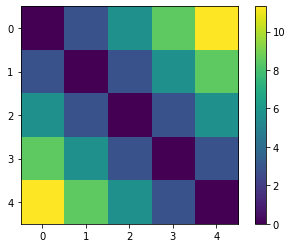

In [14]:
plt.imshow(dist)
plt.colorbar()

## Example computing log probabilities of a batch of data

In [15]:
# mean: (D,)
# covariance: (D, D)
# data: (N, D) 
# log_prob -> (N,)
N = 10
D = 3
torch.manual_seed(0)
mean = torch.zeros(D)
cov = torch.eye(D)
data = torch.randn(N, D)
MultivariateNormal(mean, cov).log_prob(data)

tensor([-4.0859, -3.4505, -5.0958, -3.6635, -3.5402, -2.9518, -3.0057, -5.7989,
        -3.1180, -5.5450])

In [16]:
# mean: (N, D,)
# covariance: (D, D)
# data: (N, D) 
# log_prob -> (N,)
N = 10
D = 3
torch.manual_seed(0)
mean = torch.zeros((N, D))
cov = torch.eye(D)
data = torch.randn(N, D)
MultivariateNormal(mean, cov).log_prob(data)

tensor([-4.0859, -3.4505, -5.0958, -3.6635, -3.5402, -2.9518, -3.0057, -5.7989,
        -3.1180, -5.5450])

In [17]:
# mean: (D,)
# covariance: (N, D, D)
# data: (N, D) 
# log_prob -> (N,)
N = 10
D = 3
torch.manual_seed(0)
mean = torch.zeros(D)
cov = torch.eye(D).repeat(N, 1, 1)
data = torch.randn(N, D)
MultivariateNormal(mean, cov).log_prob(data)

tensor([-4.0859, -3.4505, -5.0958, -3.6635, -3.5402, -2.9518, -3.0057, -5.7989,
        -3.1180, -5.5450])

In [18]:
# mean: (K, D,)
# covariance: (K, D, D)
# data: (N, D) 
# log_prob(data.unsqueeze(1)) -> (N,K)
N = 10
D = 3
K = 4
torch.manual_seed(0)
mean = torch.zeros((K,D))
cov = torch.eye(D).repeat(K, 1, 1)
data = torch.randn(N, D)
MultivariateNormal(mean, cov).log_prob(data.unsqueeze(1))

tensor([[-4.0859, -4.0859, -4.0859, -4.0859],
        [-3.4505, -3.4505, -3.4505, -3.4505],
        [-5.0958, -5.0958, -5.0958, -5.0958],
        [-3.6635, -3.6635, -3.6635, -3.6635],
        [-3.5402, -3.5402, -3.5402, -3.5402],
        [-2.9518, -2.9518, -2.9518, -2.9518],
        [-3.0057, -3.0057, -3.0057, -3.0057],
        [-5.7989, -5.7989, -5.7989, -5.7989],
        [-3.1180, -3.1180, -3.1180, -3.1180],
        [-5.5450, -5.5450, -5.5450, -5.5450]])

In [19]:
# mean: (K, D,)
# covariance: (D, D)
# data: (N, D) 
# log_prob(data.unsqueeze(1)) -> (N,K)
N = 10
D = 3
K = 4
torch.manual_seed(0)
mean = torch.zeros((K,D))
cov = torch.eye(D)
data = torch.randn(N, D)
MultivariateNormal(mean, cov).log_prob(data.unsqueeze(1))

tensor([[-4.0859, -4.0859, -4.0859, -4.0859],
        [-3.4505, -3.4505, -3.4505, -3.4505],
        [-5.0958, -5.0958, -5.0958, -5.0958],
        [-3.6635, -3.6635, -3.6635, -3.6635],
        [-3.5402, -3.5402, -3.5402, -3.5402],
        [-2.9518, -2.9518, -2.9518, -2.9518],
        [-3.0057, -3.0057, -3.0057, -3.0057],
        [-5.7989, -5.7989, -5.7989, -5.7989],
        [-3.1180, -3.1180, -3.1180, -3.1180],
        [-5.5450, -5.5450, -5.5450, -5.5450]])